# Multiple tube generation experiment processing

![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20](id26en40lm40rm5mr20.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20
![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10](id26en40lm40rm5mr10.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os.path as op
from pprint import pprint as pp
import scipy.stats
import seaborn as sns


In [3]:
datapath = "~/teigen_data/output_rows.csv"

In [4]:
plotkw ={
    "figsize": [9, 6], 
    # "fontsize": 14
}

In [5]:
df = pd.read_csv(op.expanduser(datapath))
pp(df.keys())

# df

Index([u'appearance noise_preview', u'appearance show_aposteriori_surface',
       u'appearance skip_volume_generation', u'area volume [mm^3]',
       u'areasampling areasize_mm', u'areasampling areasize_px',
       u'areasampling voxelsize_mm', u'count []', u'datetime', u'filepattern',
       u'generator_id', u'generators Continuous tubes element_number',
       u'generators Continuous tubes fixed_radius_distribution',
       u'generators Continuous tubes normal_radius_distribution',
       u'generators Continuous tubes radius_distribution_maximum',
       u'generators Continuous tubes radius_distribution_mean',
       u'generators Continuous tubes radius_distribution_minimum',
       u'generators Continuous tubes radius_distribution_standard_deviation',
       u'generators Continuous tubes random_generator_seed',
       u'generators Continuous tubes uniform_radius_distribution',
       u'generators Gensei n_objects',
       u'generators Unconnected tubes allow_overlap',
       u'gene

In [6]:
df

,appearance noise_preview,appearance show_aposteriori_surface,appearance skip_volume_generation,area volume [mm^3],areasampling areasize_mm,areasampling areasize_px,areasampling voxelsize_mm,count [],datetime,filepattern,...,step1_total_time_s,step2_generate_volume_time_s,step2_init_datetime,step2_numeric_measurement_time_s,step2_save_volume_time_s,step2_total_time_s,surface [mm^2],surface d. [mm^-1],volume [mm^3],volume d. []
0,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,2017-06-01T16:49:43.227313,~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,8796.459430,0.007997,71209.433481,0.064736
1,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,2017-06-01T16:49:44.624431,~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,8796.459430,0.007997,71209.433481,0.064736
2,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,2017-06-01T16:49:46.066775,~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,8796.459430,0.007997,71209.433481,0.064736
3,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,2017-06-01T16:49:47.576781,~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,8796.459430,0.007997,71209.433481,0.064736
4,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,2017-06-01T16:49:49.145304,~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,8796.459430,0.007997,71209.433481,0.064736
5,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,2017-06-01T16:49:50.841951,~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,8796.459430,0.007997,71209.433481,0.064736
6,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,2017-06-01T16:49:52.553085,~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,8796.459430,0.007997,71209.433481,0.064736
7,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,2017-06-01T16:49:54.226164,~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,8796.459430,0.007997,71209.433481,0.064736
8,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,2017-06-01T16:49:55.982855,~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,8796.459430,0.007997,71209.433481,0.064736
9,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,2017-06-01T16:49:57.621892,~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,8796.459430,0.007997,71209.433481,0.064736


In [7]:

df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = df["numeric surface [mm^2]"] - df["surface [mm^2]"]
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = df["numeric volume [mm^3]"] - df["volume [mm^3]"]
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
df["length_distribution_mean"] = df["generators Unconnected tubes length_distribution_mean"]


# Numeric measurement precision (element_numer = 20, length_mean = 15)

In [8]:

dfs = df[
    df["output note"] == "resolution sphere"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
if len(dfsp) > 0:
    dfsp.plot(x="measurement_resolution", **plotkw)
dfsp

,surface error [%],volume error [%],measurement_resolution


In [9]:

#sns.factorplot("measurement_resolution", "surface error [%]", data=dfs)#.set(ylim=(0, 1))


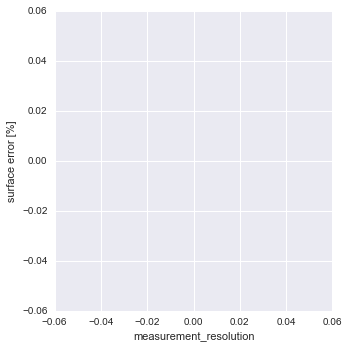

In [10]:

sns.lmplot("measurement_resolution", "surface error [%]", data=dfs)#.set(ylim=(0, 1))

In [11]:
dfs = df[
    df["output note"] == "resolution tube"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
if len(dfsp) > 0:
    dfsp.plot( x="measurement_resolution", **plotkw)
# dfsp

In [12]:
# df = pd.read_csv(op.expanduser(datapath))
# df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
# df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
# df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
# df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
# df["measurement_resolution"] = df["postprocessing measurement_resolution"]
dfs = df[
    df["output note"] == "tube length"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "length_distribution_mean"]].sort_values(
    "length_distribution_mean")
if len(dfsp) > 0:
    dfsp.plot( x="measurement_resolution", **plotkw)


In [13]:
import seaborn as sns

In [14]:
pd.__path__

['/Users/mjirik/miniconda/lib/python2.7/site-packages/pandas']

In [15]:
pd.__version__

u'0.20.1'

In [16]:
## element_number = 10, 
df["output note"]

0      compensation method 1 tube cylinder volume + s...
1      compensation method 1 tube cylinder surface + ...
2      compensation method 1 tube cylinder volume + s...
3      compensation method 1 tube cylinder surface + ...
4      compensation method 1 tube cylinder volume + s...
5      compensation method 1 tube cylinder surface + ...
6      compensation method 1 tube cylinder volume + s...
7      compensation method 1 tube cylinder surface + ...
8      compensation method 1 tube cylinder volume + s...
9      compensation method 1 tube cylinder surface + ...
10     compensation method 1 tube cylinder volume + s...
11     compensation method 1 tube cylinder surface + ...
12     compensation method 1 tube cylinder volume + s...
13     compensation method 1 tube cylinder surface + ...
14     compensation method 1 tube cylinder volume + s...
15     compensation method 1 tube cylinder surface + ...
16     compensation method 1 tube cylinder volume + s...
17     compensation method 1 tu

## Compensation methods

In [17]:
def dfplot(dfs, plotkw, radius_method=""):
    
    dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
        "measurement_resolution")
    
    if len(dfsp) < 1:
        return dfsp
    # wilcoxon - čím větší, tím lepší, alespoň 0.05
    surf_w = scipy.stats.wilcoxon(x=dfs["surface [mm^2]"], y=dfs["numeric surface [mm^2]"], correction=False, zero_method="pratt")
    # spearman čím menší, tím lepší
    surf_s = scipy.stats.spearmanr(dfs["surface [mm^2]"], dfs["numeric surface [mm^2]"])
    
    # wilcoxon - čím větší, tím lepší
    vol_w = scipy.stats.wilcoxon(x=dfs["volume [mm^3]"], y=dfs["numeric volume [mm^3]"], correction=False, zero_method="pratt")
    # spearman čím menší, tím lepší
    vol_s = scipy.stats.spearmanr(dfs["volume [mm^3]"], dfs["numeric volume [mm^3]"])
    
    print radius_method, ": \nsurface (w/s): \n" , surf_w,"\n", surf_s, "\nvolume (w/s): \n", vol_w, "\n",vol_s
    fig = plt.figure(figsize=[25, 18])
    ax = plt.subplot(121)
    dfsp.plot(
        ax=ax, x="measurement_resolution", **plotkw)
    ax = plt.subplot(122)
    dfsp[["surface error [%]", "volume error [%]"]].plot(
        ax=ax, kind="box", **plotkw)
    plt.suptitle(radius_method)
    return dfsp

### 1 sphere

In [18]:
for radius_method in ["inscribed", "circumscribed", "cylinder surface", "cylinder volume", "average", "cylinder volume + sphere compensation"]:
        
    dfs = df[
        df["output note"] == "compensation method 1 sphere " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    dfplot(dfs, plotkw, radius_method)
    


### 1 tube

cylinder volume + sphere compensation : 
surface (w/s): 
WilcoxonResult(statistic=36.0, pvalue=0.097989302707917392) 
SpearmanrResult(correlation=nan, pvalue=nan) 
volume (w/s): 
WilcoxonResult(statistic=16.0, pvalue=0.0071697342928032084) 
SpearmanrResult(correlation=nan, pvalue=nan)


/Users/mjirik/miniconda/lib/python2.7/site-packages/numpy/lib/function_base.py:2569: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/mjirik/miniconda/lib/python2.7/site-packages/numpy/lib/function_base.py:2570: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/mjirik/miniconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mjirik/miniconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mjirik/miniconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


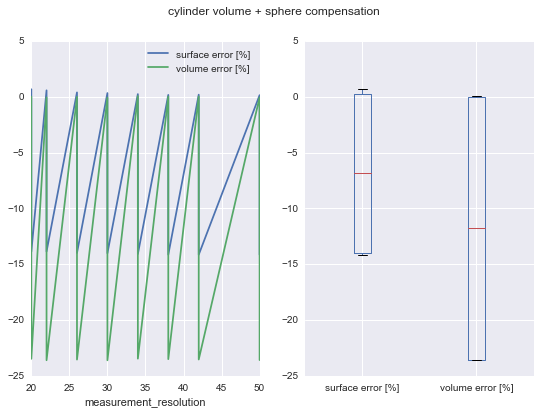

In [19]:
for radius_method in ["cylinder volume + sphere compensation"]:
        
    dfs = df[
        df["output note"] == "compensation method 1 tube " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    dfplot(dfs, plotkw, radius_method)


## 5 tubes

In [20]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in ["cylinder surface", "cylinder volume", "cylinder volume + sphere compensation", "best"]:

        
    dfs = df[
        df["output note"] == "compensation method 5 tubes " + radius_method
    ]
    
    dfplot(dfs, plotkw, radius_method)
#     dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
#         "measurement_resolution")
#     
#     fig = plt.figure(figsize=[25, 18])
#     ax = plt.subplot(121)
#     dfsp.plot(
#         ax=ax, x="measurement_resolution", **plotkw)
#     ax = plt.subplot(122)
#     dfsp[["surface error [%]", "volume error [%]"]].plot(
#         ax=ax, kind="box", **plotkw)
#     plt.suptitle(radius_method)
# 

In [21]:
for radius_method in ["inscribed", "circumscribed", "cylinder surface", 
                      "cylinder volume", "average", "cylinder volume + sphere compensation"]:
        
    dfs = df[
        df["output note"] == "compensation method " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    dfplot(dfs, plotkw, radius_method)


### Radius estimation

In [22]:
dfs[["volume [mm^3]"]]

,volume [mm^3]


In [23]:
### Kontrolní výpočet objemu

In [24]:
v_sphere = (4.0/3.0) * np.pi * 20.0**3
v_sphere

33510.32163829113

In [25]:
v_cylinder = np.pi*20.0**2 * 2.6696777
v_cylinder

3354.815939908998

In [26]:
v_cylinder + v_sphere

36865.13757820013


# Numeric and analytic error

## measurement_resolution = 25

In [27]:
# df = pd.read_csv(op.expanduser(datapath))
# df["surface error [mm^2]"] = df["numeric surface [mm^2]"] - df["surface [mm^2]"]
# df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
# df["volume error [mm^3]"] = df["numeric volume [mm^3]"] - df["volume [mm^3]"]
# df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
# df["measurement_resolution"] = df["postprocessing measurement_resolution"]
# df["element_number"] = df["generators Unconnected tubes element_number"]
# df["length_distribution_mean"] = df["generators Unconnected tubes radius_distribution_mean"]
# df["radius_distribution_mean"] = df["generators Unconnected tubes length_distribution_mean"]
dfs = df[
    df["output note"] == "compensation method 5 tubes " + "best"
]
dfsp = dfs[["volume [mm^3]", "numeric volume [mm^3]", "surface [mm^2]", "numeric surface [mm^2]", "surface error [%]", "volume error [%]"]]
dfsp

,volume [mm^3],numeric volume [mm^3],surface [mm^2],numeric surface [mm^2],surface error [%],volume error [%]


In [28]:
if len(dfsp) > 0:
    axp = dfsp[["surface [mm^2]", "numeric surface [mm^2]"]].plot(kind="box", **plotkw)

In [29]:
if len(dfsp) > 0:
    axp = dfsp[["volume [mm^3]", "numeric volume [mm^3]"]].plot(kind="box", **plotkw)

In [30]:
if len(dfsp) > 0:
    axp = dfsp[["surface error [%]", "volume error [%]"]].plot(kind="box", **plotkw)

In [31]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in ["cylinder surface", "cylinder volume", "cylinder volume + sphere compensation", "best"]:

        
    dfs = df[
        df["output note"] == "compensation method 5 tubes " + radius_method
    ]
    
    dfplot(dfs, plotkw, radius_method)


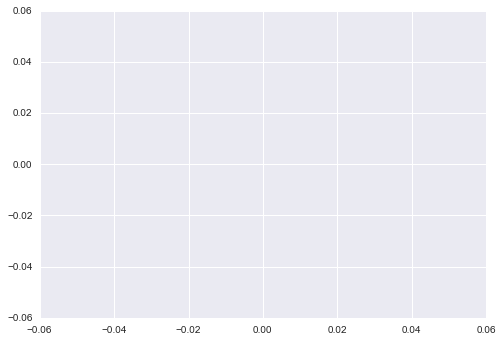

In [32]:
nsu = dfsp["numeric surface [mm^2]"]
su = dfsp["surface [mm^2]"]
nsux = np.ones([len(nsu)])
sux = np.zeros([len(su)])
y = np.concatenate([nsu, su])
x = np.concatenate([nsux,sux])
#plot(, np.concatenate([nsux,sux]))
plt.plot(x, y)

In [33]:
y.shape

(0,)

In [34]:
x.shape

(0,)

In [35]:
dfsp.describe()

,volume [mm^3],numeric volume [mm^3],surface [mm^2],numeric surface [mm^2],surface error [%],volume error [%]
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


# Statistics

In [36]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in [
    "inscribed", 
    # "circumscribed", "cylinder surface", "cylinder volume",
    "average", 
    "cylinder volume + sphere compensation", 
    "best"]:

        
    dfs = df[
        df["output note"] == "fixed resolution " + radius_method
    ]
    
    dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
        "measurement_resolution")
    
    dfplot(dfs, plotkw, radius_method)


In [37]:
dfs

,appearance noise_preview,appearance show_aposteriori_surface,appearance skip_volume_generation,area volume [mm^3],areasampling areasize_mm,areasampling areasize_px,areasampling voxelsize_mm,count [],datetime,filepattern,...,surface [mm^2],surface d. [mm^-1],volume [mm^3],volume d. [],surface error [mm^2],surface error [%],volume error [mm^3],volume error [%],measurement_resolution,length_distribution_mean


## Surface

In [38]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfs["surface [mm^2]"], y=dfs["numeric surface [mm^2]"], correction=False, zero_method="pratt")

/Users/mjirik/miniconda/lib/python2.7/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/mjirik/miniconda/lib/python2.7/site-packages/scipy/stats/morestats.py:2413: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se


WilcoxonResult(statistic=0.0, pvalue=nan)

In [39]:
scipy.stats.wilcoxon(dfs["surface error [%]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=nan)

In [40]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfs["surface [mm^2]"], dfs["numeric surface [mm^2]"])

SpearmanrResult(correlation=nan, pvalue=nan)

## Volume

In [41]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfs["volume [mm^3]"], y=dfs["numeric volume [mm^3]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=nan)

In [42]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfs["volume [mm^3]"], dfs["numeric volume [mm^3]"])

SpearmanrResult(correlation=nan, pvalue=nan)

# Inscribed to circum

In [43]:
resolution = 6
radius = 10

alpha = (2*np.pi) / (resolution)
radius_out = radius / np.cos(alpha/2)

radius_out


11.547005383792515

In [44]:
np.cos(np.pi/2)

6.123233995736766e-17